In [1]:
import numpy as np
import pandas as pd
import pylab as plt
import matplotlib

%matplotlib inline

In [10]:
#trouble shooting
#defensive programming, easier to identify that reading though entire trace

VERBOSE = True    #global variable, not changed thruout code
cleaned_data_location = '../data/gapminder_cleaned.csv'

try:
    df = pd.read_csv(cleaned_data_location)
    if VERBOSE:
        print(df.head())
except FileNotFoundError:
        print("could not find data files, check path? you tried", cleaned_data_location)

   year       pop  lifeexp   gdppercap      country continent
0  1952   8425333   28.801  779.445314  afghanistan      asia
1  1957   9240934   30.332  820.853030  afghanistan      asia
2  1962  10267083   31.997  853.100710  afghanistan      asia
3  1967  11537966   34.020  836.197138  afghanistan      asia
4  1972  13079460   36.088  739.981106  afghanistan      asia


In [20]:
years = df['year'].unique()
years.sort()
assert years[-1] == 2007, "the most recent year is not 2007" #breaks if not true, can 

refactoring example

In [33]:
##calculate mean life expectancy for continent by all years
category = 'lifeexp'
continent = 'asia'

mask_continent = df['continent'] == continent ##makes 'holes' over rows with asia
df_continent = df[mask_continent]

years = df_continent['year'].unique()
summary = []

for year in years:
    mask_year = df_continent['year'] == year
    df_year = df_continent[mask_year]
    value = np.mean(df_year[category])
    summary.append((continent, year, value))

assert len(summary) ==12

result_df = pd.DataFrame(summary, columns=['continent', 'year', category])
result_df

,continent,year,lifeexp
0,asia,1952,46.314394
1,asia,1957,49.318544
2,asia,1962,51.563223
3,asia,1967,54.663640
4,asia,1972,57.319269
5,asia,1977,59.610556
6,asia,1982,62.617939
7,asia,1987,64.851182
8,asia,1992,66.537212
9,asia,1997,68.020515


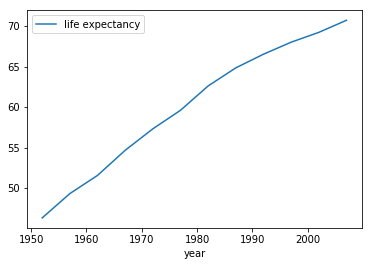

In [34]:
result_df.plot.line('year', category, label='life expectancy')

In [36]:
def calc_mean_over_time(data, category, continent, verbose=False):
    # calculate mean category for continent by all years
    
    #create mask that selects the continent
    mask_continent = data['continent'] == continent ##makes 'holes' over rows with asia
    df_continent = data[mask_continent]
    
    #loop over years and calc statistic of interest
    years = df_continent['year'].unique()
    summary = []

    for year in years:
        if verbose:
            print(year)
        mask_year = df_continent['year'] == year
        df_year = df_continent[mask_year]
        value = np.mean(df_year[category])
        summary.append((continent, year, value))
    
    #there should be 12 record for each contintent
    assert len(summary) ==12
    
    #turn summary into a data frames so we can easily viz
    result_df = pd.DataFrame(summary, columns=['continent', 'year', category])
    return result_df

In [65]:
def calc_stat_over_time(stat, data, category, continent, verbose=False):
    # calculates a given statistic of category for continent by all years
    
    #create mask that selects the continent
    mask_continent = data['continent'] == continent ##makes 'holes' over rows with asia
    df_continent = data[mask_continent]
    
    #loop over years and calc statistic of interest
    years = df_continent['year'].unique()
    summary = []

    for year in years:
        if verbose:
            print(year)
        mask_year = df_continent['year'] == year
        df_year = df_continent[mask_year]
        value = stat(df_year[category])
        summary.append((continent, year, value))
    
    #there should be 12 record for each contintent
    assert len(summary) ==12
    
    #turn summary into a data frames so we can easily viz
    result_df = pd.DataFrame(summary, columns=['continent', 'year', category])
    return result_df

In [69]:
calc_stat_over_time(np.mean, df, 'lifeexp', 'asia')

,continent,year,lifeexp
0,asia,1952,46.314394
1,asia,1957,49.318544
2,asia,1962,51.563223
3,asia,1967,54.663640
4,asia,1972,57.319269
5,asia,1977,59.610556
6,asia,1982,62.617939
7,asia,1987,64.851182
8,asia,1992,66.537212
9,asia,1997,68.020515


In [81]:
def stat_over_time(data, category, continent, func, verbose=False):
    """Calculate values of a statistic through time
    
    Args:
        data: a dataframe
        category: one of the column headers of the data frame (e.g. 'lifeexp')
        continent: possible values of continent column in that data frame (e.g. 'asia')
        func: the function to apply to the data values (e.g. np.mean)
        
    Returns:
        a summary table of the value per year
        
    """
    #check the values
    assert category in data.columns.values, 'category must be one of the data frame column values'
    assert 'continent' in data.columns.values, 'data frame must have a "continent" column'
    assert continent in data['continent'].unique(), 'continent value not found in data frame'
    
    #create mask that selects the continent
    mask_continent = data['continent'] == continent ##makes 'holes' over rows with asia
    df_continent = data[mask_continent]
    
    #loop over years and calc statistic of interest
    years = df_continent['year'].unique()
    summary = []

    for year in years:
        if verbose:
            print(year)
        mask_year = df_continent['year'] == year
        df_year = df_continent[mask_year]
        value = func(df_year[category])
        summary.append((continent, year, value))
    
    #there should be 12 record for each contintent
    assert len(summary) ==12
    
    #turn summary into a data frames so we can easily viz
    result_df = pd.DataFrame(summary, columns=['continent', 'year', category+'_'+ func.__name__]) 
        #adds name of executed function to column
    return result_df

In [80]:
stat_over_time(df, 'lifeexp', 'asia', np.mean)

,continent,year,lifeexp_mean
0,asia,1952,46.314394
1,asia,1957,49.318544
2,asia,1962,51.563223
3,asia,1967,54.663640
4,asia,1972,57.319269
5,asia,1977,59.610556
6,asia,1982,62.617939
7,asia,1987,64.851182
8,asia,1992,66.537212
9,asia,1997,68.020515


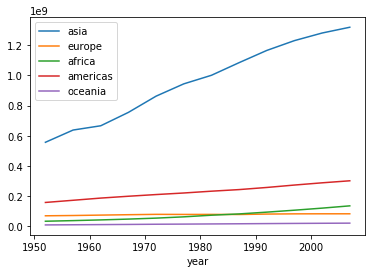

In [92]:
continents = df['continent'].unique()
fig, ax = plt.subplots()

#print(continents)

for continent in continents:
    category = 'pop'
    func = np.max
    output = stat_over_time(df, category, continent, func)
    output.plot.line('year', category+"_"+func.__name__, ax=ax, label=continent)
